In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")

# Load Dataset
df_product = pd.read_csv("data_produk.csv")
df_transaction = pd.read_csv("transaksi_toko.csv")

print("Data berhasil di-load!")
print(f"Jumlah baris transaksi: {len(df_transaction)}")

Data berhasil di-load!
Jumlah baris transaksi: 20


In [2]:
# Merging (Inner Join otomatis membuang Product ID yang tidak ada di Master Data)
df_all = df_transaction.merge(df_product, how="inner", on="product_id")

# Handling Missing Values pada kolom 'jumlah_beli' dengan Modus
mode_jumlah = df_all['jumlah_beli'].mode()[0]
df_all['jumlah_beli'] = df_all['jumlah_beli'].fillna(mode_jumlah)

# Cek apakah masih ada data kosong
print("Jumlah Missing Values:", df_all.isnull().sum().sum())
df_all.head()

Jumlah Missing Values: 0


,id_transaksi,tanggal,product_id,jumlah_beli,nama_produk,kategori,harga
0,1,2025-01-01,101,2.0,Kopi Susu,Minuman,15000
1,2,2025-01-02,102,1.0,Latte,Minuman,20000
2,3,2025-01-03,101,5.0,Kopi Susu,Minuman,15000
3,4,2025-01-03,105,2.0,Mineral Water,Air,5000
4,5,2025-01-01,103,1.0,Espresso,Minuman,18000


In [3]:
# Menghitung Total Bayar (Omzet)
df_all['total_bayar'] = df_all['jumlah_beli'] * df_all['harga']

# Parsing Tanggal & Ekstrak Nama Hari
df_all['tanggal'] = pd.to_datetime(df_all['tanggal'])

# Mapping nama hari ke Bahasa Indonesia (agar konsisten di semua sistem)
kamus_hari = {
    'Monday': 'Senin', 'Tuesday': 'Selasa', 'Wednesday': 'Rabu',
    'Thursday': 'Kamis', 'Friday': 'Jumat', 'Saturday': 'Sabtu', 'Sunday': 'Minggu'
}
df_all['hari'] = df_all['tanggal'].dt.day_name().map(kamus_hari)

df_all[['tanggal', 'hari', 'total_bayar']].head()

,tanggal,hari,total_bayar
0,2025-01-01,Rabu,30000.0
1,2025-01-02,Kamis,20000.0
2,2025-01-03,Jumat,75000.0
3,2025-01-03,Jumat,10000.0
4,2025-01-01,Rabu,18000.0


In [4]:
# Insight 1: Produk Terlaris
top_product = df_all.groupby('nama_produk')['jumlah_beli'].sum().sort_values(ascending=False)
print("=== Produk Terlaris ===")
print(top_product.head(1))
print("-" * 30)

# Insight 2: Omzet Tertinggi per Tanggal
top_omzet = df_all.groupby('tanggal')['total_bayar'].sum().sort_values(ascending=False)
print("=== Tanggal Omzet Tertinggi ===")
print(top_omzet.head(1))

=== Produk Terlaris ===
nama_produk
Kopi Susu    16.0
Name: jumlah_beli, dtype: float64
------------------------------
=== Tanggal Omzet Tertinggi ===
tanggal
2025-01-01    213000.0
Name: total_bayar, dtype: float64


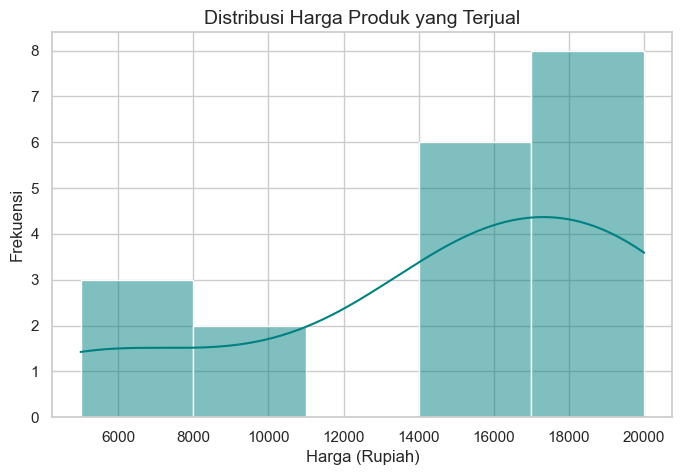

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_all, x='harga', kde=True, color='teal', bins=5)

plt.title('Distribusi Harga Produk yang Terjual', fontsize=14)
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.show()

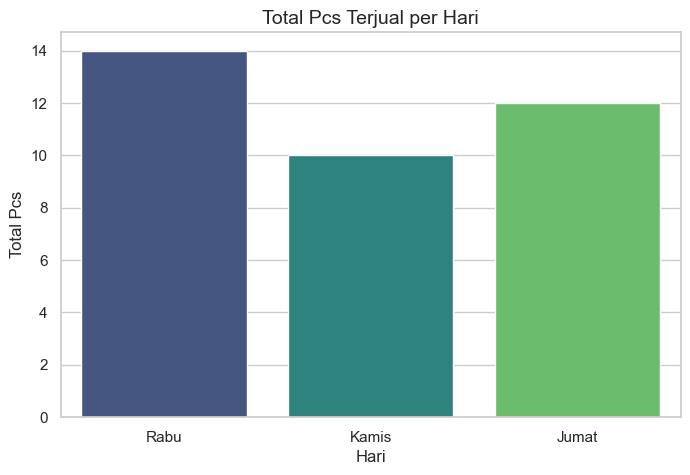

In [13]:
# Agregasi data penjualan per hari
daily_sales = df_all.groupby('hari')['jumlah_beli'].sum().reindex([
    'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'
])

# Bersihkan data NaN (agar tidak error saat plotting)
clean_sales = daily_sales.dropna()

plt.figure(figsize=(8, 5))

# REVISI: Tambahkan parameter hue=... dan legend=False
sns.barplot(
    x=clean_sales.index, 
    y=clean_sales.values, 
    hue=clean_sales.index,
    palette="viridis", 
    legend=False
)

plt.title('Total Pcs Terjual per Hari', fontsize=14)
plt.xlabel('Hari')
plt.ylabel('Total Pcs')
plt.show()